In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from matplotlib import font_manager
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox

In [14]:
#read in data
df = pd.read_excel("Week5Bond.xlsx")

#filter only acceptable responses
df = df[df["Response"]=="Acceptable"].reset_index(drop=True)

C:\Users\LISA~1.HOR\AppData\Local\Temp/ipykernel_14100/2868750239.py:82: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig("MakeoverMonday2020W05_brexit-bond.png", bbox_inches="tight",pad_inches=0.2)


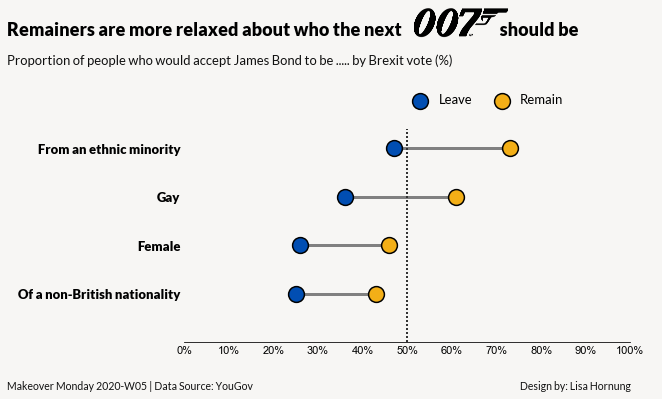

In [71]:
# =========
#colors and font styles
colors = {"Remain": "#F3AF17", "Leave": "#014EB2"}
highlight_font = font_manager.FontProperties(fname='C:\\WINDOWS\\Fonts\\007 GoldenEye.ttf')
title_font = font_manager.FontProperties(fname='C:\\WINDOWS\\Fonts\\Lato-Black.ttf')
label_font = font_manager.FontProperties(fname='C:\\WINDOWS\\Fonts\\Lato-Regular.ttf')

# =========
# Initialise Figure and define layout
fig, ax = plt.subplots(figsize=(9,4))
fig.set_facecolor("#f7f6f4")
   
#make plot area transparent
plt.subplots_adjust(left=0.01, bottom=0, right=0.9, top=0.80, wspace=None, hspace=None)
plt.gca().patch.set_alpha(0) 

#remove grid
for pos in ['right', 'top',  'left']:
    ax.spines[pos].set_visible(False)

# ===========
# plot data
                  
# sort data by Remain values
df = df.sort_values(by="Remain", ascending=True)
my_range=range(1,len(df.index)+1)


# The horizontal plot is made using the hline function
plt.hlines(y=my_range, xmin=df['Leave'], xmax=df['Remain'],linewidth=3, color='grey', alpha=1, zorder=2)
plt.scatter(df['Leave'], my_range, s=250, color=colors["Leave"],linewidth=1.5, edgecolors='black', 
            alpha=1 , label='Leave', zorder=3)
plt.scatter(df['Remain'], my_range, s=250, color=colors["Remain"], linewidth=1.5, edgecolors='black', 
            alpha=1, label='Remain', zorder=3)

#==========
#annotation
plt.hlines(y=my_range, xmin=df['Leave'], xmax=df['Remain'],linewidth=3, color='grey', alpha=1, zorder=1)
plt.plot([50, 50], [0,4.4],linestyle= (0,(1, 1)), linewidth=2, color='#333333')

# ==========
#y-axis
plt.tick_params(axis='both', length = 0, color = "#444444")
plt.gca().set_ylim(ymin=0)
plt.yticks(my_range, df['Category'], fontproperties=title_font, fontsize=13)

#x-axis
plt.xticks(np.arange(0,110,10), fontfamily='Arial')
plt.tick_params(axis='x', labelsize=11)
plt.gca().set_xlim(xmin=0, xmax=100)
plt.gca().xaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda x, pos: '{:,.0f}%'.format(x)))

# ==========
#legend
L = ax.legend(ncol=2, frameon=False, loc='upper right',bbox_to_anchor=(0.87,1.15))
plt.setp(L.texts, fontfamily="Lato", fontsize=13)


# ==========
# Title and footer
plt.figtext(0,1.15,'Remainers are more relaxed about who the next                            should be',
         fontsize = 18, weight = 'bold', fontproperties=title_font, color='black')
plt.figtext(0,1.05, "Proportion of people who would accept James Bond to be ..... by Brexit vote (%)", 
            fontsize=13, ha='left',  color="#111111", fontfamily="Lato")

# add logo
newax = fig.add_axes([0.625,1.1,0.15,0.15], anchor='NE', zorder=1)
newax.imshow(im)
newax.axis('off')

#footer
plt.figtext(0,-0.08, "Makeover Monday 2020-W05 | Data Source: YouGov", fontsize=10.5,
            ha='left', color="#111111", fontfamily="Lato")
plt.figtext(1.0,-0.08, "Design by: Lisa Hornung            ",
            fontsize=10.5, ha='right', color="#111111", fontfamily="Lato")

# ==========
#save
plt.savefig("MakeoverMonday2020W05_brexit-bond.png", bbox_inches="tight",pad_inches=0.2)


# Show the graph
plt.show()

## Adding logo to charts

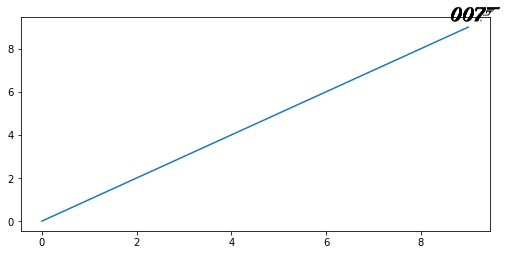

In [12]:
#option 1 --> imshow added to a specific axes
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
im = plt.imread('007-logo.png') # insert local path of the image.
fig, ax = plt.subplots()
ax.plot(range(10))

newax = fig.add_axes([0.9,.9,0.1,0.1], anchor='NE', zorder=1)
newax.imshow(im)
newax.axis('off')
plt.show()

In [ ]:
# Otion 2: usuing AnnotationBbox 
# COULDN'T GET THE POSITIONING WORKING CORRECTLY ....
fig, ax = plt.subplots(figsize=(7,4))
fig.set_facecolor("#f7f6f4")

logo = OffsetImage(plt.imread('007-logo.png'), zoom=0.02)
ab = AnnotationBbox(logo, [6,1], xybox=(15, 7),xycoords="data",box_alignment=(0.5, 0.5),frameon=False)
#ab = AnnotationBbox(logo, [10,10], xycoords='figure pixels',frameon=False)
fig.add_artist(ab)

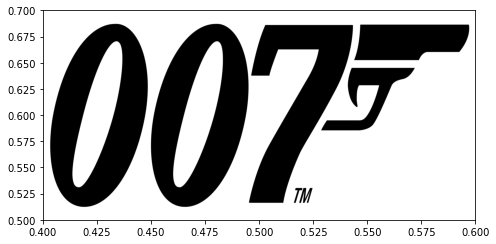

In [29]:
im = plt.imread('007-logo.png')
fig, ax = plt.subplots()
ax.imshow(im, aspect='auto', extent=(0.4, 0.6, .5, .7), zorder=-1)

In [ ]:
arr_lena = mpimg.imread('Lenna.png')
imagebox = OffsetImage(arr_lena, zoom=0.2)
ab = AnnotationBbox(imagebox, (0.4, 0.6))
ax.add_artist(ab)

## Experimenting with custom font

In [ ]:
from matplotlib import font_manager

### Find system fonts

In [42]:
font_manager.findSystemFonts(fontpaths=None, fontext="ttf")

['C:\\WINDOWS\\Fonts\\Lato-Black.ttf',
 'C:\\Windows\\Fonts\\trebuc.ttf',
 'C:\\Windows\\Fonts\\ariali.ttf',
 'C:\\WINDOWS\\Fonts\\cambria.ttc',
 'C:\\Windows\\Fonts\\seguisym.ttf',
 'C:\\WINDOWS\\Fonts\\Candaral.ttf',
 'C:\\Windows\\Fonts\\msyhl.ttc',
 'C:\\WINDOWS\\Fonts\\taileb.ttf',
 'C:\\Windows\\Fonts\\Ubuntu-L.ttf',
 'C:\\Windows\\Fonts\\Sitka.ttc',
 'C:\\Windows\\Fonts\\comicz.ttf',
 'C:\\WINDOWS\\Fonts\\consolai.ttf',
 'C:\\Windows\\Fonts\\corbelz.ttf',
 'C:\\WINDOWS\\Fonts\\Gabriola.ttf',
 'C:\\WINDOWS\\Fonts\\seguisb.ttf',
 'C:\\Windows\\Fonts\\l_10646.ttf',
 'C:\\Windows\\Fonts\\Ubuntu-BI.ttf',
 'C:\\WINDOWS\\Fonts\\WINGDNG2.TTF',
 'C:\\WINDOWS\\Fonts\\consola.ttf',
 'C:\\WINDOWS\\Fonts\\Candara.ttf',
 'C:\\WINDOWS\\Fonts\\framd.ttf',
 'C:\\WINDOWS\\Fonts\\tahoma.ttf',
 'C:\\Windows\\Fonts\\segoescb.ttf',
 'C:\\Windows\\Fonts\\segoeuii.ttf',
 'C:\\WINDOWS\\Fonts\\segoeuib.ttf',
 'C:\\Windows\\Fonts\\corbelb.ttf',
 'C:\\Windows\\Fonts\\consolai.ttf',
 'C:\\Windows\\Fonts\\pa

### Apply custom font without installing it

In [ ]:
title_font = font_manager.FontProperties(fname='C:\\WINDOWS\\Fonts\\Lato-Black.ttf')